<a href="https://colab.research.google.com/github/TOKTAK007/Image-Segment/blob/main/Lotteryrev09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    812519, 157196, 845093, 375805, 121789, 913106,
    613106, 484669, 943703, 929332, 331583, 436594,
    620405, 981417, 361807, 319196, 155012, 658642,
    395919, 970618, 737867, 61905, 98597, 944308,
    880159, 819068, 639235, 77258, 32761, 45037,
    386372, 578171, 70935, 114475, 46750, 910261,
    556725, 713517, 691861, 292972, 684579, 501272,
    100787, 472270, 890422, 835538, 424603, 912307,
    38495, 803628, 201303, 100994, 972661, 506404,
    286051, 837893, 244083, 999997, 945811, 569391,
    873286, 347258, 516967, 831567, 51095, 503446,
    875938, 781403, 589227, 491774, 510541, 529924,
    453522, 17223, 967375, 812564, 691197, 340388,
    798787, 775476, 387006, 369765, 943647, 174055,
    516461, 962526, 61324, 570331, 109767, 724628,
    345650, 74824, 967134, 197079, 735867, 356564
])

# แปลงข้อมูล numpy เป็น tensor ของ PyTorch
data = torch.tensor(data, dtype=torch.float32).view(-1, 1)
print(data.shape)

# กำหนดพารามิเตอร์
hidden_size = 100
num_layers = 2
lr = 0.01
epochs = 1000
batch_size = 96
input_size = 1
output_size = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# สร้างโมเดล LSTM
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # สร้าง initial hidden state และ cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # ผ่าน LSTM layer
        out, _ = self.lstm(x, (h0, c0))
        
        # ผ่าน fully connected layer
        out = self.fc(out[-1])
        
        return out

# สร้างโมเดล
model = LSTM(input_size, hidden_size, output_size, num_layers)

# กำหนดฟังก์ชัน loss และ optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


torch.Size([96, 1])




---
ใช่ครับ ฟังก์ชัน size() ใน PyTorch จะ return ขนาดของ tensor ในแต่ละ dimension โดยตัวเลขที่ได้จะแทนจำนวน elements ใน dimension นั้น ๆ ซึ่งสำหรับ tensor แบบ (batch_size, sequence_length, input_size) นั้น ขนาดของ dimension แรก คือ batch_size ดังนั้น x.size(0) จึงจะเป็น batch_size นั่นเองครับ


---





---
การใช้ view() ในส่วนของโค้ดนี้ เป็นการเปลี่ยนรูปแบบของ Tensor โดยที่ไม่ได้เปลี่ยนค่าของ Tensor นั้น ๆ แต่เพียงแค่เปลี่ยนวิธีการอ่านข้อมูลใน Tensor นั้นใหม่


---



โดย x.view(-1, 1, input_size) จะทำการแปลง x จากขนาด (batch_size, sequence_length, input_size) เป็นขนาด (batch_size*sequence_length, 1, input_size) โดยที่ 1 คือจำนวนช่องทาง (channel) ใน Convolutional Neural Network (CNN) ซึ่งใน LSTM นั้นไม่ได้ใช้เรื่องช่องทาง เราจึงใช้ 1 แทน


---



โดย -1 ใน view() คือการกำหนดให้ PyTorch คำนวณจำนวนแถวอัตโนมัติโดยคำนวณจากขนาดของ Tensor ต้นฉบับและขนาดที่ระบุอื่น ๆ ใน view() อีกสองตัว ในกรณีนี้จะเป็น batch_size * sequence_length ดังนั้น, ค่าในที่นี้คือ (20, 5) จะถูกแปลงเป็น (100, 1, 5) ซึ่งเป็นขนาดที่เหมาะสมสำหรับ LSTM กับข้อมูลนี้ที่มี sequence_length เป็น 1


---






---
_pred, _ = model(data.view(len(data), 1, -1), hidden) เป็นการใช้โมเดล LSTM ใน PyTorch ที่ train ไว้แล้วเพื่อทำนาย output โดยรับ input จากตัวแปร data ซึ่งเป็น tensor ของ PyTorch 


---



โดยมีรูปแบบเป็น sequence และ hidden จากครั้งที่แล้ว โดย y_pred จะเป็น tensor ของ PyTorch ที่เก็บผลลัพธ์ output ที่ทำนายได้จากโมเดล LSTM สำหรับแต่ละ time step ซึ่งก็คือการทำนายผลลัพธ์ของแต่ละข้อมูลในตัวแปร data โดยมีรูปแบบเป็น tensor ของ PyTorch ขนาดเท่ากับ (sequence_length, batch_size, output_size) 


---



ซึ่งในที่นี้ output_size = 12 ตามที่กำหนดไว้ในตัวแปร output_size และ _ จะเป็น hidden state จากครั้งที่แล้วที่ไม่ได้ใช้งานในการ predict แต่ใช้ในการเก็บ hidden state ของโมเดล LSTM สำหรับ input ถัดไป


---






---


โดย x จะเท่ากับตัวเลข 48 ตัวสุดท้าย
และ y เท่ากับตัวเลข 48 ตัวแรกของ data

-1 คือ ตัวเลขสุดท้าย ไล่มาถึงตัวที่ -90


---



In [ ]:
x = data[-48:]
y = data[:48]


In [ ]:
print(x.shape, y.shape)

torch.Size([48, 1]) torch.Size([48, 1])




---

10:11 ใน Python หมายถึง slice ของลำดับข้อมูล (sequence) ที่เริ่มต้นที่ index 10 และสิ้นสุดที่ index 11 (ไม่รวม index 11) 


---


ดังนั้น slice นี้จะประกอบด้วยข้อมูลตัวเดียวที่อยู่ในลำดับที่ 10 ของ sequence นั้น ๆ ซึ่งในที่นี้ก็คือ data[10] ดังนั้นถ้าเราเขียน y = data[10:11] ก็จะได้ค่า y เท่ากับ list ที่มีสมาชิกเป็นค่าตัวเดียวคือ data[10]


---



In [ ]:
from sklearn.model_selection import train_test_split

# Split into train (70%) and validation+test (30%)
X_train, X_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.3, random_state=42)

# Split validation+test into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 33
Validation set size: 7
Test set size: 8


In [ ]:
print(X_train[:5])

tensor([[347258.],
        [503446.],
        [197079.],
        [831567.],
        [999997.]])




---


5 elements โดยแต่ละ element เป็น tensor ขนาด 6x1 ที่ประกอบไปด้วยตัวเลข 6 ตัวในแต่ละตัวแปร ซึ่งแต่ละตัวแปรเป็นตัวเลขที่มีค่าอยู่ในช่วงที่กำหนดโดยข้อมูลดังกล่าว

---



In [ ]:
X_train_to_tensor = [t.clone().detach() for t in X_train] #ให้มีค่าเท่ากันในแต่ละ element เพราะ มีค่าไม่เท่่ากัน
X_train_ready = torch.cat(X_train_to_tensor, dim=0)

In [ ]:
y_train_to_tensor = [t.clone().detach() for t in y_train]
y_train_ready = torch.cat(y_train_to_tensor, dim=0)

In [ ]:
X_val_tensor = [t.clone().detach() for t in X_val]
X_val_ready = torch.cat(X_val_tensor, dim=0)

In [ ]:
y_val_tensor = [t.clone().detach() for t in y_val]
y_val_ready = torch.cat(y_val_tensor, dim=0)

In [ ]:
X_test_tensor = [t.clone().detach() for t in X_test]
X_test_ready = torch.cat(X_test_tensor, dim=0)

In [ ]:
y_test_tensor = [t.clone().detach() for t in y_test]
y_test_ready = torch.cat(y_test_tensor, dim=0)



---
มันไม่สามารถแปลงได้เพราะว่า list ของ tensor ที่ให้มามีขนาดไม่เท่ากัน ซึ่งในการแปลง list เป็น tensor จะต้องมีขนาดเท่ากันทุกตัว ดังนั้นเมื่อเราลองใช้ torch.tensor ในการแปลง list ดังกล่าว จะเกิด error ขึ้นว่า "ValueError: expected sequence of length 6 at dim 1 (got 1)" เนื่องจากจำนวน element ในแต่ละ tensor ของ list ไม่เท่ากัน



---






---
น PyTorch การใช้ torch.cat เป็นการนำ tensor หลายๆ ชิ้นมาต่อกันในแนวทแยง (concatenation) โดยเราสามารถระบุแกน (dimension) ที่จะใช้ต่อได้ด้วย dim argument



---


ดังนั้น dim=1 ใน torch.cat(my_list_of_tensors, dim=1) หมายถึง การต่อข้อมูล (concatenate) ในแนวแกนที่ 1 ของ tensor ทุกๆตัวใน my_list_of_tensors โดยที่แนวแกนที่ 1 คือแนวแกนที่แนวตั้ง (vertical) ของ tensor หรือแกน column ในกรณีที่เรามอง tensor เป็นตาราง 


---


ดังนั้นจะได้ tensor ใหม่ที่มีขนาดเป็น (num_rows, total_num_columns) โดยที่ num_rows เป็นจำนวนแถวของ tensor แต่ละตัวใน my_list_of_tensors และ total_num_columns เป็นผลรวมของจำนวน column ของ tensor ทุกตัวใน my_list_of_tensors


---




In [ ]:
print(X_train_ready.shape)

torch.Size([33])


In [ ]:
print(y_train_ready.shape)

torch.Size([33])


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# สร้าง Dataset สำหรับ train, validation และ test
train_dataset = TensorDataset(X_train_ready, y_train_ready)     #convert to tensor for transform to dataset form 
val_dataset = TensorDataset(X_val_ready, y_val_ready)
test_dataset = TensorDataset(X_test_ready, y_test_ready)

# กำหนด batch size สำหรับ DataLoader
# batch_size = 48

# สร้าง DataLoader สำหรับ train, validation และ test
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




---
Dataloader และ Dataset เป็นสององค์ประกอบสำคัญในการสร้างโมเดลการเรียนรู้เชิงลึกใน PyTorch โดยมีบทบาทแตกต่างกันดังนี้


---



Dataset: เป็นคลาสที่ใช้สำหรับเก็บข้อมูลตัวอย่างและเป็นส่วนสำคัญในการสร้าง dataloader ใน PyTorch โดย Dataset จะถูกสร้างขึ้นมาเพื่อเตรียมข้อมูลสำหรับการใช้งานในโมเดล ซึ่งจะมีฟังก์ชันสำหรับการดึงข้อมูลออกมาเพื่อนำไปใช้ในการเทรนโมเดล


---



Dataloader: เป็นอีกคลาสหนึ่งที่ใช้สำหรับการเตรียมข้อมูลเพื่อนำเข้าไปใช้ในโมเดล โดย Dataloader จะทำหน้าที่จัดการการสุ่มข้อมูลสำหรับการเทรนโมเดล และสร้าง batch ของข้อมูลเพื่อนำไปใช้ในการเรียนรู้ของโมเดล นอกจากนี้ Dataloader ยังสามารถทำงานแบบ parallel ได้เพื่อเพิ่มประสิทธิภาพในการโหลดข้อมูล


---



ดังนั้น Dataset และ Dataloader เป็นส่วนสำคัญที่ใช้ร่วมกันในการสร้างโมเดลการเรียนรู้เชิงลึกใน PyTorch โดย Dataset จะเป็นส่วนที่ใช้เก็บข้อมูลตัวอย่างและมีฟังก์ชันสำหรับการดึงข้อมูลออกมาใช้ในการเทรน ในขณะเดียวกัน Dataloader จะใช้สำหรับการจัดการการสุ่มข้อมูลและสร้าง batch ของข้อมูลเพื่อนำไปใช้ในการเรียนรู้ของโมเดล และยังสามารถทำงานแบบ parallel ได้เพื่อเพิ่มประสิทธิภาพ


---




In [ ]:
# # train the model and record loss and accuracy for each epoch
train_loss = []
train_acc = []
val_loss = []
val_acc = []


for epoch in range(epochs):
      running_loss = 0.0
      running_corrects = 0.0
      steps = 0
      for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        x = x.view(-1, 1, input_size)
        y_pred = model(x)
        y = y.view(-1, 1)  # เพิ่มบรรทัดนี้
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        _, preds = torch.max(y_pred, 0)
        running_loss += loss.item() * x.size(0)
        running_corrects += torch.sum(preds == y.data)
        steps += 1
   
train_loss.append(running_loss / len(train_loader.dataset))
train_acc.append(running_corrects.double() / len(train_loader.dataset))

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([33, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)




---
ปัญหาก็เป็นเพราะขนาดของ tensor y ไม่ตรงกับขนาดของ tensor y_pred ที่ได้จากโมเดล ตาม error message ที่แจ้งมาว่า The size of tensor a (5) must match the size of tensor b (20) at non-singleton dimension 0 ซึ่งหมายความว่า tensor y_pred มีขนาดเป็น (20, 5) ในขณะที่ tensor y มีขนาดเป็น (5,) ซึ่งทำให้ไม่สามารถนำไปคำนวณ loss ได้


---



การแก้ไขปัญหานี้คือให้ตรวจสอบขนาดของ tensor y ว่าเป็น (20,) หรือ (20, 1) หรือไม่ และแก้ไขขนาดของ tensor y เพื่อให้ตรงกับขนาดของ tensor y_pred ดังนี้


---





---


torch.max(y_pred, 1) จะคืนค่าสอง outputs คือ max_values และ max_indices โดย max_values คือ tensor ที่มีค่าเท่ากับค่ามากที่สุดในแต่ละ row ของ y_pred และ max_indices คือ tensor ที่มี index ของค่ามากที่สุดในแต่ละ row ของ y_pred นั่นเอง

ดังนั้น _, preds = torch.max(y_pred, 1) จึงหมายความว่าไม่สนใจ max_values แต่เก็บแค่ max_indices ในตัวแปร preds ซึ่งก็คือ index ของค่าที่มากที่สุดในแต่ละ row ของ y_pred นั่นเอง


---
train_acc.append(running_corrects.double() / len(train_loader.dataset)) คือการคำนวณค่า accuracy ของโมเดลในแต่ละ epoch แล้วเก็บค่า accuracy นั้นไว้ใน list train_acc ซึ่งจะถูกใช้งานในการ visualize learning curve หรือประเมินประสิทธิภาพของโมเดลในภายหลัง


---



สูตรการคำนวณ accuracy คือ (จำนวนตัวอย่างที่ทำนายถูกต้อง) / (จำนวนตัวอย่างทั้งหมด) โดยในที่นี้ running_corrects คือจำนวนตัวอย่างที่โมเดลทำนายถูกต้องในแต่ละ epoch และ len(train_loader.dataset) คือจำนวนตัวอย่างทั้งหมดในชุดข้อมูล train นั่นเอง


---
double เป็นชนิดข้อมูลที่ใช้เก็บตัวเลขที่มีทศนิยมแบบคู่ โดยมีความยาว 64 บิต (64-bit) ซึ่งเป็นชนิดข้อมูลที่มีความแม่นยำสูงกว่า float (32-bit) และสามารถจัดเก็บตัวเลขที่มีค่ามากกว่า float ได้ โดย double


---



มักจะใช้ในการคำนวณทางวิทยาศาสตร์และเทคโนโลยีต่างๆ เช่น การคำนวณทางคณิตศาสตร์ เครื่องจักรอิเล็กทรอนิกส์ หรือการประมวลผลภาพ และวิดีโอ เป็นต้น การใช้ double จะช่วยลดความเสียหายจากการปัดเศษลงในการคำนวณ และสามารถให้ความแม่นยำสูงขึ้น ซึ่งเป็นสิ่งที่ต้องการในการคำนวณ accuracy ของโมเดลในการเทรนและวัดประสิทธิภาพของโมเดล


---







---


net.eval() เป็น method ของ PyTorch ที่ใช้สำหรับเปลี่ยนโหมดการทำงานของโมเดลจากโหมด train เป็นโหมด evaluation ซึ่งมีผลต่อการประมวลผลและการคำนวณของโมเดล โดยโหมด train จะเป็นโหมดสำหรับการฝึกโมเดลโดยจะมีการเรียกใช้ฟังก์ชัน Dropout ซึ่งจะทำให้โมเดลมีการทำงานแบบสุ่มขึ้น 


---


ในขณะที่โหมด evaluation จะเป็นโหมดสำหรับการใช้โมเดลจริงๆ โดยไม่มีการใช้ Dropout หรือการทำงานแบบสุ่มอื่นๆ ซึ่งจะช่วยให้ผลลัพธ์ที่ได้มีความเสถียรและสามารถนำไปใช้งานได้จริง


---



ดังนั้นการเรียกใช้ net.eval() จะเป็นการเปลี่ยนโหมดการทำงานของโมเดลจากโหมด train เป็นโหมด evaluation เพื่อใช้สำหรับการทำนายหรือใช้งานจริง โดยจะเรียกใช้เมื่อเราต้องการใช้โมเดลสำหรับการทำนายหรือใช้งานจริง 


---



หลังจากเราได้ฝึกโมเดลเสร็จเรียบร้อยแล้ว โดยปกติแล้วจะถูกเรียกใช้หลังจากเราเรียกใช้ฟังก์ชัน torch.no_grad() เพื่อปิดการคำนวณของ Gradient ที่ไม่จำเป็นในการทำนายหรือใช้งานจริง ทำให้การทำงานของโมเดลเร็วขึ้นและประหยัดทรัพยากรของเครื่องเมื่อเทียบกับการใช้โหมด train


---





---


epoch+1 คือเลข epoch ที่เรากำลัง train ในขณะนั้น
train_loss[-1] และ train_acc[-1] คือค่า loss และค่า accuracy ของชุดข้อมูล train ใน epoch สุดท้ายที่เราทำการ train


---


val_loss[-1] และ val_acc[-1] คือค่า loss และค่า accuracy ของชุดข้อมูล validation ใน epoch สุดท้ายที่เราทำการ train

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([7, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1000: Train Loss: 355819716608.0000, Train Acc: 0.0000, Val Loss: 513856077824.0000, Val Acc: 0.0000


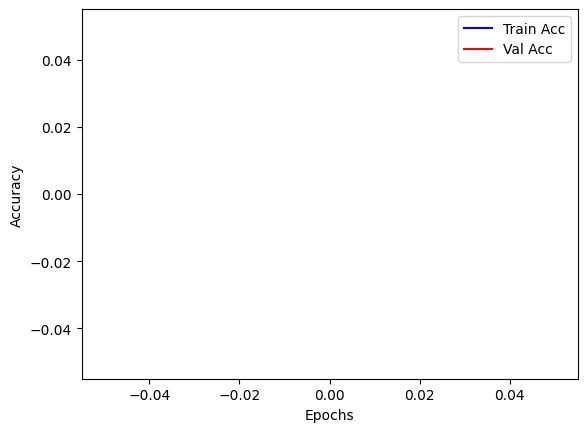

In [ ]:
model.eval()
val_running_loss = 0.0
val_running_corrects = 0.0
for x, y in val_loader:
        x, y = x.to(device), y.to(device)
        x = x.view(-1, 1, input_size)
        y_pred = model(x)
        y = y.view(-1, 1)  # เพิ่มบรรทัดนี้
        loss = criterion(y_pred, y)
        _, preds = torch.max(y_pred, 0)
        val_running_loss += loss.item() * x.size(0)
        val_running_corrects += torch.sum(preds == y.data)
   
val_loss.append(val_running_loss / len(val_loader.dataset))
val_acc.append(val_running_corrects.double() / len(val_loader.dataset))
   
print(f'Epoch {epoch+1}: Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}')

# plot the training and validation accuracies over time
plt.plot(train_acc, 'b-', label='Train Acc')  #'b-' คือการกำหนดสีและลักษณะของเส้นกราฟ ในที่นี้คือเส้นสีน้ำเงินแบบสามเหลี่ยม
plt.plot(val_acc, 'r-', label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()